In [9]:
import tensorflow as tf

from distutils.version import LooseVersion
import warnings

import keras
from keras import models
from keras import layers as l

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 2.2.0


<ipython-input-9-5854f4e0540b>:19: UserWarning: No GPU found. Please ensure you have installed TensorFlow correctly
  warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')


In [2]:
path = keras.utils.get_file(
    'data.dat'
    , origin='https://s3.amazonaws.com/rochfort/flood_drought.dat'
)

dataset = open(path).read()

606208/600901 [==============================] - 0s 0us/step


In [6]:
model = models.Sequential()
model.add(l.Conv2D(256, (3, 3), activation='relu', input_shape=(612, 612, 1)))
model.add(l.MaxPooling2D((2, 2)))
model.add(l.Conv2D(612, (3, 3), activation='relu'))
model.add(l.MaxPooling2D((2, 2)))
model.add(l.Conv2D(612, (3, 3), activation='relu'))
model.add(l.Flatten())
model.add(l.Dense(612, activation='relu'))
model.add(l.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [3]:
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()


11493376/11490434 [==============================] - 2s 0us/step

In [4]:
len(train_images)

60000

In [5]:
len(test_images)

10000

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

In [8]:
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [10]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
model.compile(
    optimizer='rmsprop'
    , loss='categorical_crossentropy'
    , metrics=['accuracy']
)

hist = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 14s 234us/step - loss: 0.1773 - accuracy: 0.9441

In [12]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

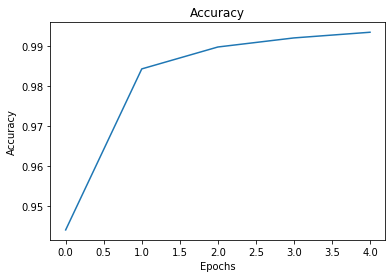

In [13]:
plt.plot(hist.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

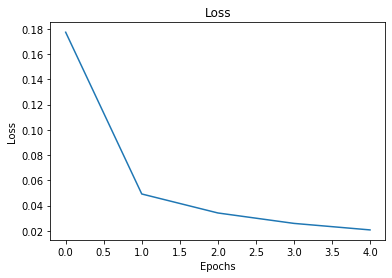

In [14]:
plt.clf()
plt.plot(hist.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [15]:
_, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 68us/step


In [16]:
print(f'Accuracy: {test_acc * 100}%')

Accuracy: 99.37000274658203%


In [18]:
model.save("final_model.h5")

In [19]:
def setVals(index1, index2, dataset):
    modelsets = index1 + index2 + dataset
    print("DEBUG: " + modelsets)